# **Importing needed libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#**Loading Dataset**

In [ ]:
df=pd.read_csv('/content/Iris.csv')

#**Data visualization**

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

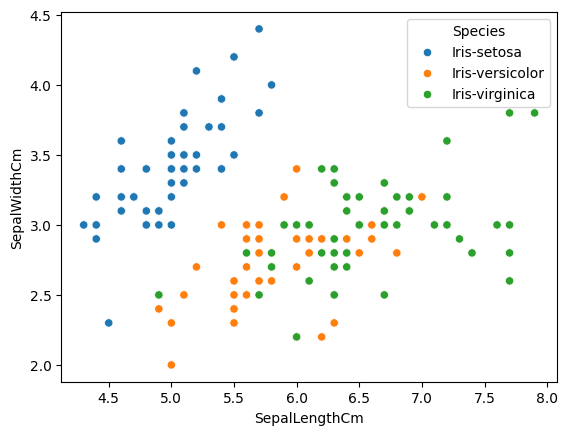

In [ ]:
sns.scatterplot(data=df,x="SepalLengthCm",y="SepalWidthCm",hue="Species")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

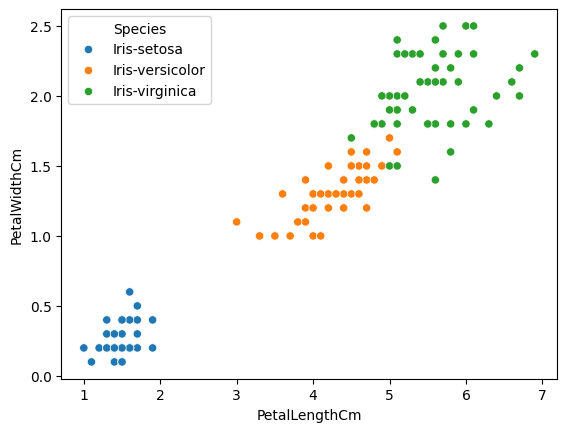

In [ ]:
sns.scatterplot(data=df,x="PetalLengthCm",y="PetalWidthCm",hue="Species")

#**Data preprocessing**

In [ ]:
X=df.drop(['Species'],axis=1)
Y=df['Species']

In [ ]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

testing our model with built in KNN

In [ ]:
pp= KNeighborsClassifier(n_neighbors=5,metric="cosine")

In [ ]:
pp.fit(X_train,y_train)
y_pred=pp.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9777777777777777


# **Implementing the 3 Distance measures from scratch**

In [ ]:
def Minkowski_Distance(x,y,p):
    return math.pow(np.sum(np.abs(x - y) ** p),1/p)

In [ ]:
def Cosine_Similarity(x,y):
  dot_product=np.dot(x,y)
  normx=np.linalg.norm(x)
  normy=np.linalg.norm(y)
  return 1-(dot_product/(normx*normy))

#**KNN from Scratch**

In [ ]:
class KNNClassifier:
  def __init__(self,k=5,Distance_measure="Euclidean"):
      self.k=k
      self.Distance_measure=Distance_measure
  def fit(self,X_train,y_train):
    self.X_train = np.array(X_train)
    self.y_train = np.array(y_train)

  def predict(self,X_test):
    X_test = np.array(X_test)
    y_pred = []
    for x in X_test:
      y_pred.append(self.own_predict(x))
    return np.array(y_pred)

  def own_predict(self,x):
    arr=[]
    for i,j in enumerate(self.X_train):

      if self.Distance_measure=="Euclidean":
        curr_distance=Minkowski_Distance(x,j,2)
      elif self.Distance_measure=="Manhattan":
          curr_distance=Minkowski_Distance(x,j,1)
      elif self.Distance_measure=="Cosine_Similarity":
          curr_distance=Cosine_Similarity(x,j)
      arr.append((curr_distance,self.y_train[i]))
    arr.sort()
    KNN=arr[:self.k]
    freq={}#for majority vote
    for _, label in KNN:
      if label in freq:
        freq[label]+=1
      else :
        freq[label] = 1

    result = max(freq, key = freq.get)
    return result


#**Checking Accuracies**

In [ ]:
Distances=["Euclidean","Manhattan","Cosine_Similarity"]

for distance_measure in Distances:
  model=KNNClassifier(k=5,Distance_measure=distance_measure)
  model.fit(X_train,y_train)
  y_pred =model.predict(X_test)
  pred =np.array(y_pred)
  test =np.array(y_test)
  correct=0
  for i in range(len(pred)):
    if pred[i]==test[i]:
        correct+=1
  incorrect=len(y_test)-correct
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Used Distance_measure is : {distance_measure} distance")
  print(f"numbers of correct predictions is : {correct}")
  print(f"numbers of incorrect predictions is : {incorrect}")
  print(f"Accuracy is : {accuracy * 100}%")
  print(f"\n----------------------------------------------------------\n")

Used Distance_measure is : Euclidean distance
numbers of correct predictions is : 45
numbers of incorrect predictions is : 0
Accuracy is : 100.0%

----------------------------------------------------------

Used Distance_measure is : Manhattan distance
numbers of correct predictions is : 45
numbers of incorrect predictions is : 0
Accuracy is : 100.0%

----------------------------------------------------------

Used Distance_measure is : Cosine_Similarity distance
numbers of correct predictions is : 44
numbers of incorrect predictions is : 1
Accuracy is : 97.77777777777777%

----------------------------------------------------------

